In [27]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [28]:
# import csv file
df = pd.read_csv('Sales_Data.csv', encoding= 'unicode_escape')

#### Basic Information about Dataset

In [29]:
# to find total no. of rows and column
df.shape
#first element of set is no. of row and second is no. of column

(11251, 15)

In [30]:
# to get top 5 or 10 rows based on choice
df.head()
#it helps to get a idea about what kind of dataset we're gonna work

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [31]:
#to get information about datatype of all the columns and no. of null values contain in it.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


 By using info function we can easily identify three major errors
1. Marital status should be an object and should contain values like married or single for easy use
2. Amount column contain null values which need to be removed
3. status and unnamed1 columns should be removed as they are completely empty

#### Data Cleaning

In [32]:

#1.to convert values  and datatype of marital status column
def conv(value):
    if value == 0:
        return "Single"
    elif value==1:
        return "Married"

df['Marital_Status'] = df['Marital_Status'].apply(conv)
df
#note as our input was string it automatically changed the datatype from int to object

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,Single,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,Single,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,Married,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,Single,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,Single,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,Single,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [ ]:
#3.  to remove status and unnamed1 columns  as they are completely empty
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)#inplace is used to reassign the task without making a new variable


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,Single,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,Single,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,Married,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,Single,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,Single,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,Single,Karnataka,Southern,Agriculture,Office,3,206.0


In [ ]:
#2. to remove null values from any column
df.dropna(inplace=True)
# we need to drop rows containing null values bcoz we cant analyze them

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,Single,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,Single,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,Married,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,Single,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,Single,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,Single,Karnataka,Southern,Agriculture,Office,3,206.0


In [38]:
#another method to verify existence of null values
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [40]:
#converting amount column from float to int for covinence
df['Amount']=df['Amount'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  object
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1.2+ MB


In [43]:
# to get description of certain numeric values
df[['Age','Amount','Orders']].describe()

,Age,Amount,Orders
count,11239.000000,11239.000000,11239.000000
mean,35.410357,9453.610553,2.489634
std,12.753866,5222.355168,1.114967
min,12.000000,188.000000,1.000000
25%,27.000000,5443.000000,2.000000
50%,33.000000,8109.000000,2.000000
75%,43.000000,12675.000000,3.000000
max,92.000000,23952.000000,4.000000


#### Exploratory Data Analysis

##### Gender

###### 1.Count vs Gender (Bar Graph)

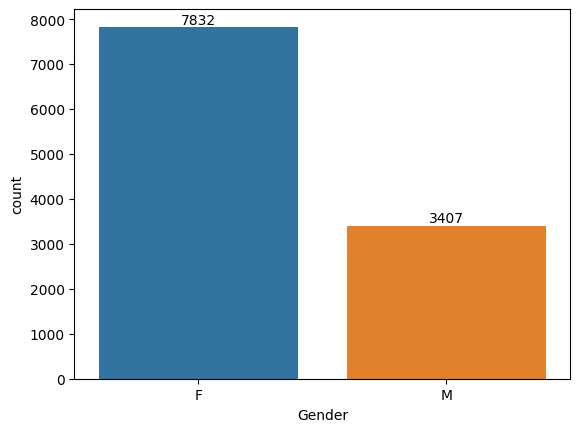

In [46]:
ax = sns.countplot(x = 'Gender',data = df,hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

###### 2.Total Amount vs Gender (Bar Graph)

<Axes: xlabel='Gender', ylabel='Amount'>

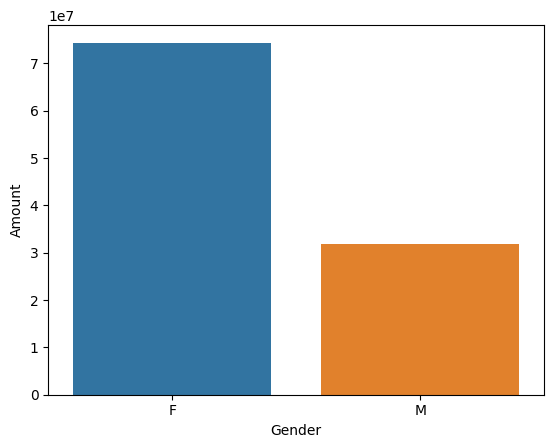

In [49]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen,hue='Gender')

From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

##### Age Group

###### 1.Count vs Age Group

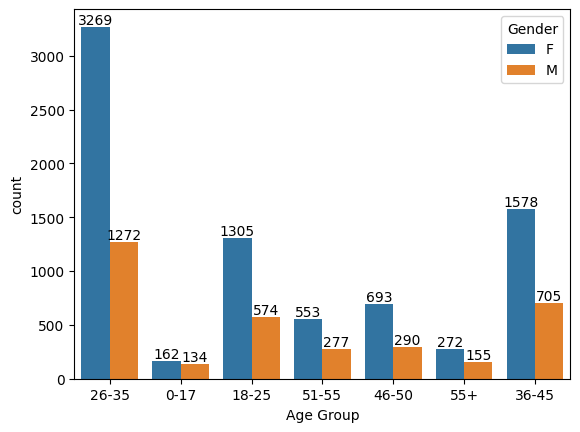

In [51]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

###### 2.Total Amount vs Age Group 

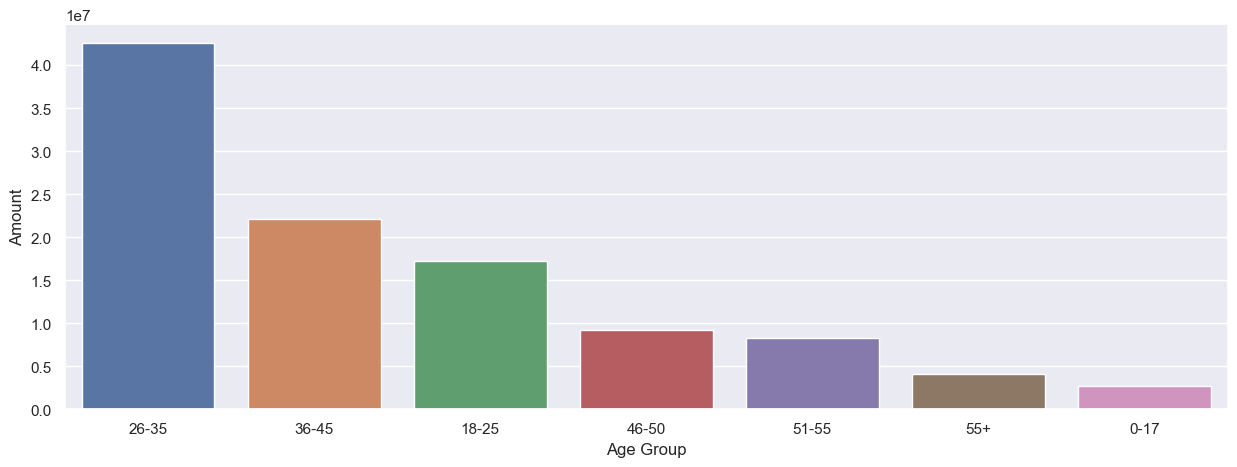

In [90]:
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age,hue='Age Group');

From above graphs we can see that most of the buyers are of age group between 26-35 yrs female


##### State

###### 1.Total Orders vs State (Top 10)

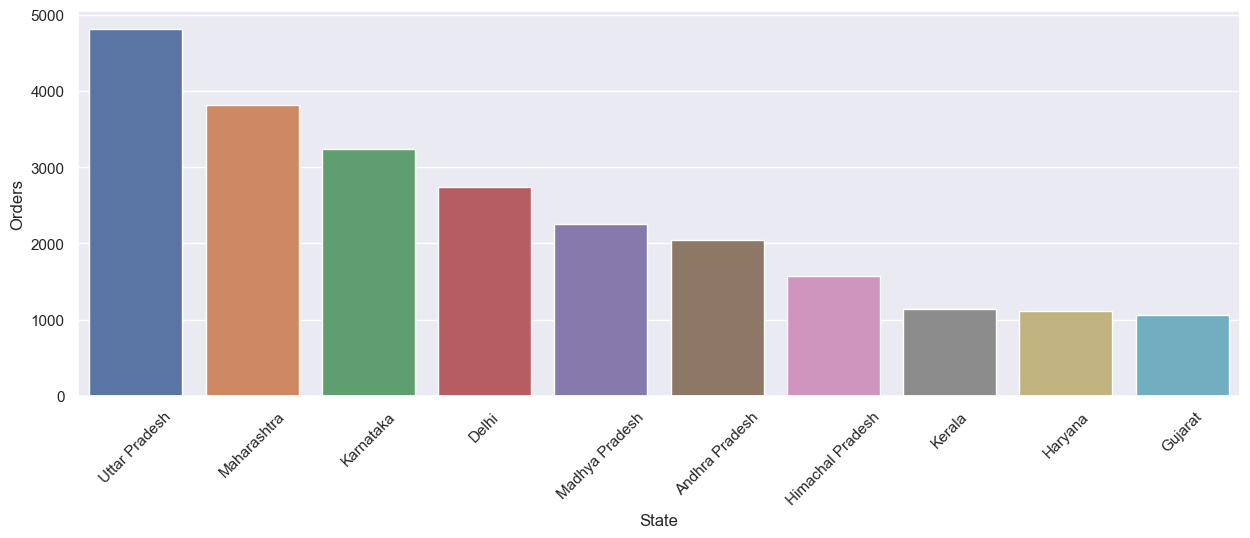

In [87]:
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set_theme(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders',hue='State')
plt.xticks(rotation = 45);

###### 2.Total Amount vs State (Top 10)

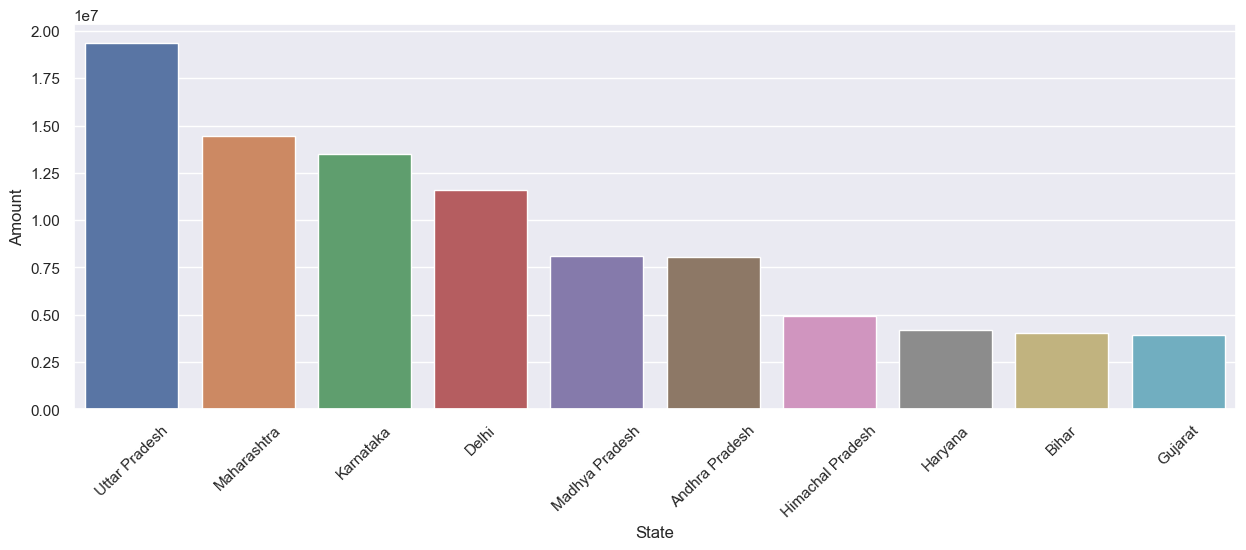

In [60]:
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set_theme(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount',hue='State')
plt.xticks(rotation=44);

From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

##### Marital Status

###### 1.Count vs Marital status

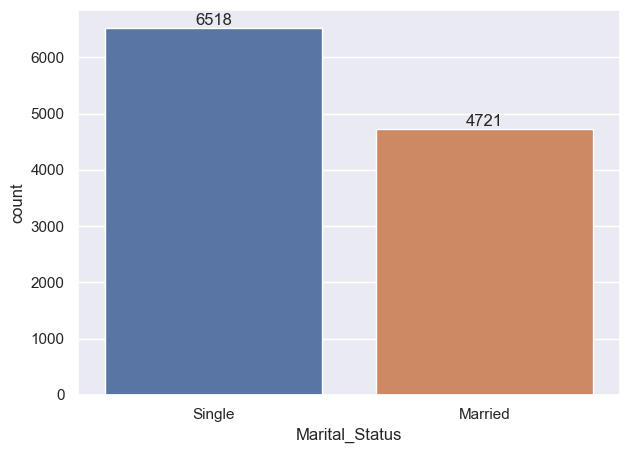

In [62]:
ax = sns.countplot(data = df, x = 'Marital_Status',hue='Marital_Status')

sns.set_theme(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

###### 2.Amount vs Marital Status

<Axes: xlabel='Marital_Status', ylabel='Amount'>

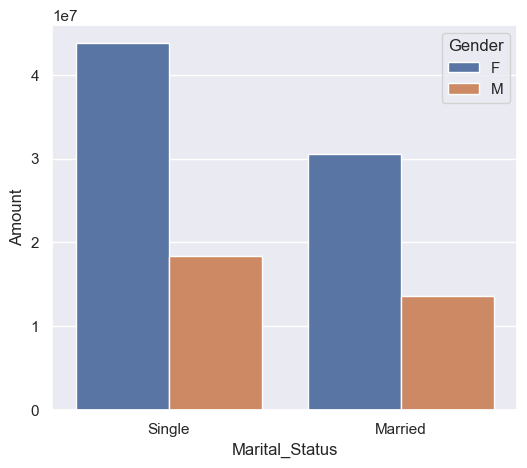

In [63]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

##### Occupation

###### 1.Count vs Occupation

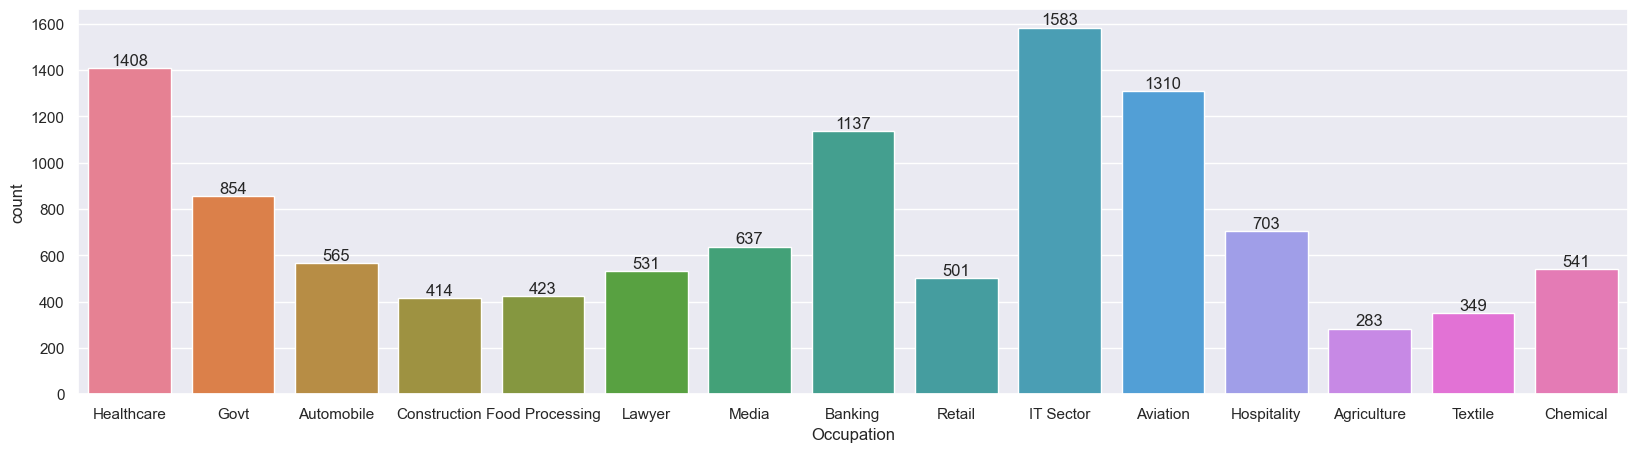

In [65]:
sns.set_theme(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation',hue='Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

###### 2.Total Amount vs Occupation


<Axes: xlabel='Occupation', ylabel='Amount'>

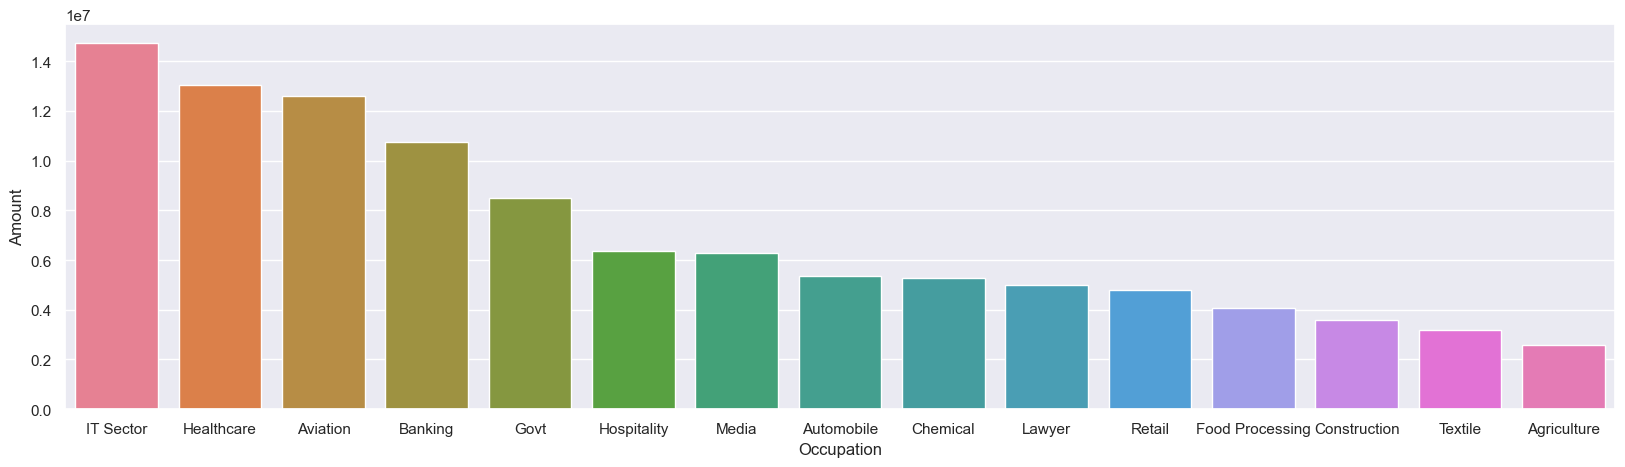

In [67]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount',hue='Occupation')

From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

##### Product Category


###### 1.Count vs Product Category

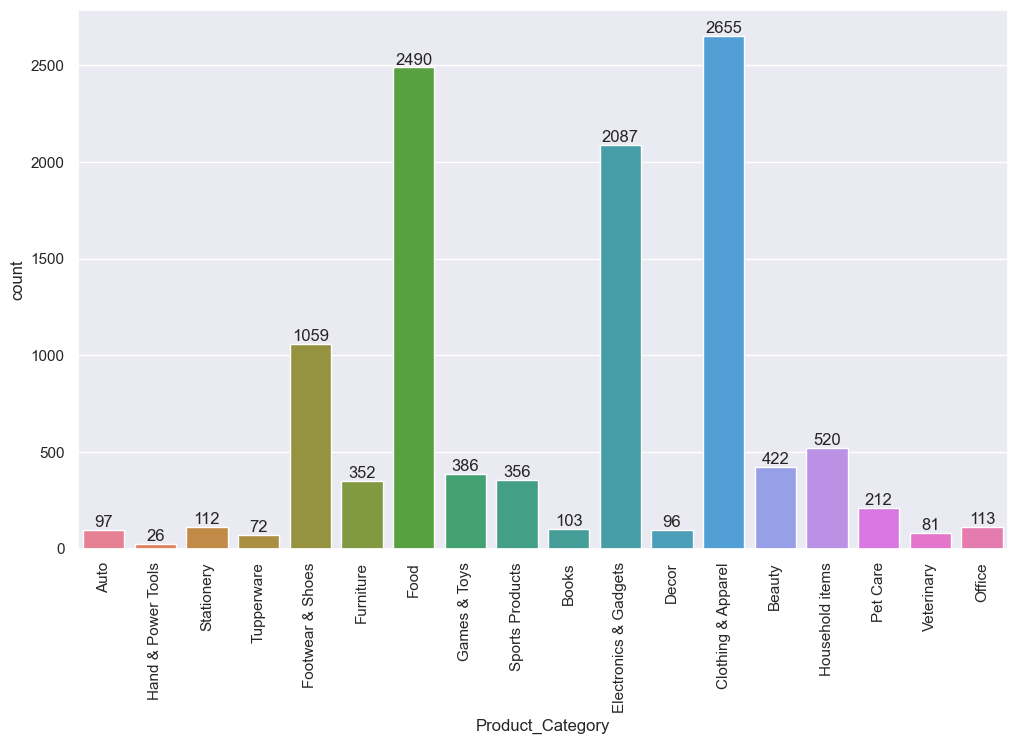

In [86]:
sns.set_theme(rc={'figure.figsize':(12,7)})
ax = sns.countplot(data = df, x = 'Product_Category',hue='Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

plt.xticks(rotation=90);

###### 2.Top 10 Product Category Total Amount wise

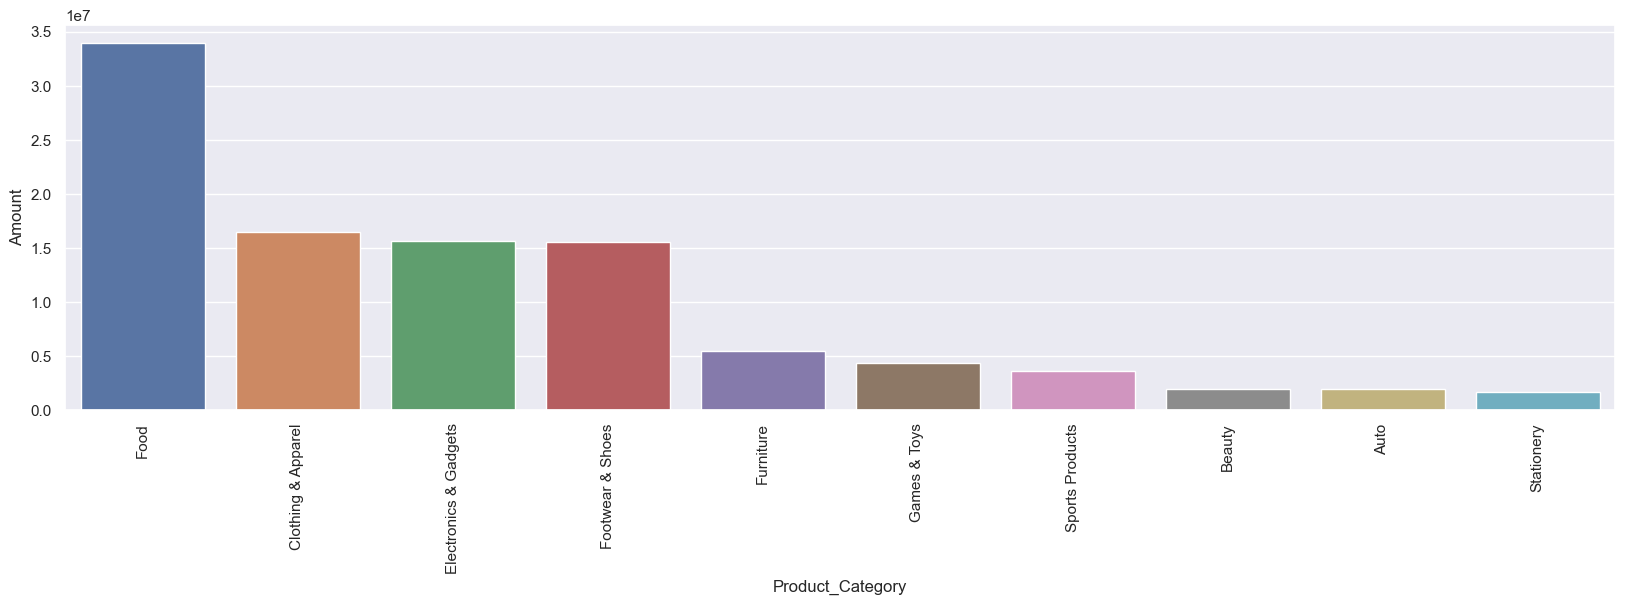

In [77]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount',hue='Product_Category')
plt.xticks(rotation=90);

From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

##### Top 10 Products orders wise

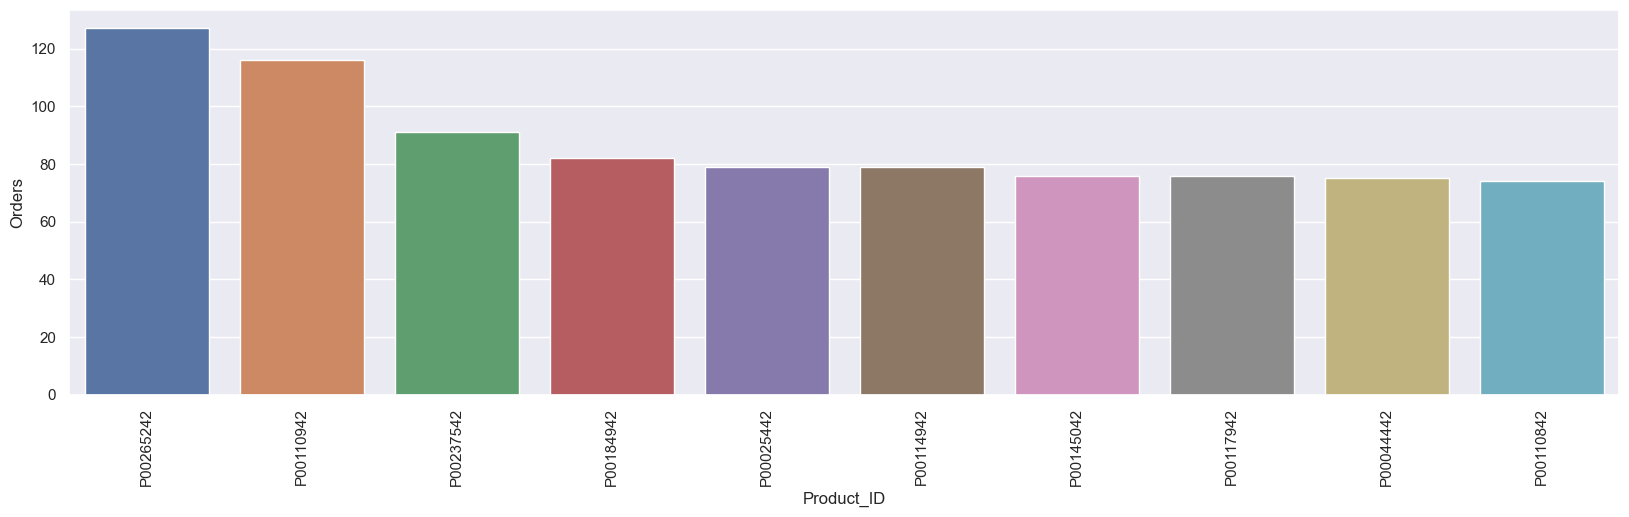

In [85]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set_theme(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders',hue='Product_ID')
plt.xticks(rotation=90);

##### Conclusion:
###### Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category